# CP-113A: Analyzing the American Community Survey (ACS)


---

**Estimated Time:** 60 Minutes

**Professor:** Sara Hinkley

**Developers:** Carlos Calderon and Ritvik Iyer

Welcome to Analyzing the ACS! In this lab, we will introduce you to Jupyter Notebooks and the tools that you are going to use to conduct your data analysis of the American Community Survey (ACS). In the main part of this notebook, you will learn how to read tabular datasets, interpret data visualizations, and compare various economic indicators. By the end of this notebook, you will also apply your knowledge to answer a set of short answer questions.

---


## Table of Contents

1. [Introduction to the Jupyter Notebook](#introduction)<a name="introduction"></a><br>
2. [Understanding the Dataset](#pt2) <a name='pt2'></a><br>
3. [Analysis on Wages](#wages) <a name='wages'></a><br>
4. [Top Industries and Occupations in California](#industries) <a name='industries'></a><br>
5. [Income Analysis](#income) <a name='income'></a><br>
6. [Educational Level Analysis](#education) <a name='education'></a><br>
7. [Indicators of Poverty](#poverty) <a name='poverty'></a><br>
8. [Bibliography](#bibliography) <a name='bibliography'></a><br>
9. [Data Science Opportunities at UC Berkeley](#6) <a name='6'></a><br>
---

## Assistance

If you need assistance with this notebook, our peer advisors are happy to help. You can find their drop-in hours [here](https://data.berkeley.edu/academics/resources/peer-consulting). 

You can also email ds-peer-consulting@berkeley.edu to book an appointment if the times conflict with your schedule.

<br><br>
# Part 1: The Jupyter Notebook <a id='intrduction'></a>

Before we start our lab, we want to give a brief introduction to Jupyter Notebooks (like this one) where you will work on conducting your survey analysis. 

**Jupyter notebooks** are documents that can contain a seamless compilation of text, code, visualizations, and more. A notebook is composed of two types of rectangular **cells**:  markdown and code. A **markdown cell**, such as this one, contains text. A **code cell** contains code. All of the code in this notebook is written in a programming language called **Python**. You can select any cell by clicking it once. After a cell is selected, you can navigate the notebook using the up and down arrow keys or by simply scrolling.

<br><br>
### 1.1 Run a cell <a id='subsection 0a'></a>
To run a code cell once it's been selected, 
- press `Shift` + `Enter`, or
- click the Run button in the toolbar at the top of the screen. 

If a **code cell** is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number corresponding to the order in which the cell was run will replace the asterisk and any output from the code will appear under the cell.

<br><br>
### 1.2 Editing a cell <a id='subsection 0c'></a>

**Question 1.2.1** You can edit a Markdown cell by clicking it twice. Text in Markdown cells is written in [**Markdown**](https://daringfireball.net/projects/markdown/), a formatting syntax for plain text, so you may see some funky symbols when you edit a text cell. Once you've made your changes, you can exit text editing mode by running the cell. 

**Task: Edit the next cell to fix the misspelling of the word, "survey."**

This is an analysis of economic survy data.

<br><br>
### 1.3 Saving and loading <a id='subsection 0d'></a>

#### Saving and Loading

Your notebook can record all of your text and code edits, as well as any graphs you generate or calculations you make. You can save the notebook in its current state by clicking `Control-S`/`Command-S`, clicking the **floppy disc icon** in the toolbar at the top of the page, or by navigating to **File > Save and Checkpoint** in the menu bar.

The next time you open the notebook, it will look the same as when you last saved it.

**Note:** After loading a notebook you will see all the outputs (graphs, computations, etc) from your last session, but you won't be able to use any variables you assigned or functions you defined. You can get the functions and variables back by re-running the cells where they were defined – the easiest way is to **highlight the cell where you left off work, then go to Cell > Run all above** in the menu bar. You can also use this menu to run all cells in the notebook by clicking **Run all**.

<br><br><br>
**Please run the cell below to load the modules we will be using throughout this notebook.**

In [1]:
from datascience import *
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from utils import dollar_formatter
sns.set_palette("Blues_d")

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

<br><br><br><br><br>
# Part 2: Understanding the Dataset <a id ='pt2'></a>

Many times data comes in the form of a **dataset**, or table, with rows and columns that contain information about a certain topic. In this lab, we will be analyzing data from the **American Community Survey (ACS)**. This data is a sample survey of U.S. households, which asks questions about demographics, income, employment, education, and public assistance. According to the **United States Census Bureau**,

> "The American Community Survey (ACS) helps local officials, community leaders, and businesses understand the changes taking place in their communities. It is the premier source for detailed population and housing information about our nation."

More Information on the data can be found [here](https://www.census.gov/programs-surveys/acs). 

<br><br>
First, run the cell below to get an idea of what our dataset looks like

In [2]:
acs_data = Table().read_table('industry_2007.csv')
acs_data.show(2)

Year,State,County,City,Ownership Status,Household Income,Foodstamp Recipient,Age,Race,Hispanic,Education Status,Employment Status,Part of Labor Force,Occupation,Industry,Type of Worker,Employment Sector,Hours worked per week,Pre-Tax Wages,Poverty Status
2007,California,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",Not in identifiable city (or size group),Owned or being bought (loan),104800,No,59,White,Not hispanic,Some college,Employed,"Yes, in the labor force",Production,"Transportation, Warehouse",Works for wages,Local govt employee,40,49000,Non-Poverty
2007,California,"Los Angeles-Long Beach-Anaheim, CA","Los Angeles, CA",Owned or being bought (loan),120400,No,55,White,Not hispanic,College,Employed,"Yes, in the labor force",Sales,"Transportation, Warehouse",Works for wages,private,30,100000,Non-Poverty


The table above displays a random sample of every survey response from the ACS survey in 2007. Here we show you the first two rows.

Each **row** of the table represents *an individual, unique response*. Along the top of the table are the **columns:** these represent *the questions that the survey asks* respondents about. Our dataset consists of two surveys of Californian residents, combined for the years 2007 and 2017. Our goal is to compare trends over time. 

You can also scroll left and right while hovering over the table to see all the columns.

<br><br><br>
### 2.1 Computational Analysis <a id='pt2.1'></a>

At the very bottom, notice that the dataset is states `(367177 rows omitted) rows have been omitted`. This is because our dataset is really large. In fact, it's so large that it would be very difficult to visualize it in a single notebook! Therefore, we turn to **computational analysis**, a method of answering questions about data by using a computer. In this notebook, we use tools like data visualizations to answer interesting questions based on our survey data.

<br><br>
Suppose we want to answer the question: **What percentage of all survey respondents are Foodstamp Recipients?**

Obviously, for a dataset with few entries, this would be pretty easy to answer. However, for our dataset of 360,000+ respondents, this would be very difficult to count by hand. However, with code, this is easy to answer! 


*Run the cell below to calculate the percentage of Foodstamp Recipients in our dataset.* 
<br><br>

In [3]:
print(str(np.round(acs_data.where('Foodstamp Recipient', 'Yes').num_rows/acs_data.num_rows, 5)*100) + '%')

3.406%


In *one line of code*, we were able to get an idea of the demographics of a large population- this is the power of computational analysis!


Now, let's delve into the data analysis.

<br><br><br><br><br>
# 3. Analysis on Wages <a id='wages'></a>

In this section, we will investigate trends in wages between various industries and occupations. First, we will examine wages, industry, and occupation separately, and then compare them against each other and other survey variables. 

**Run the cell below to load the relevant datasets.**

In [4]:
industry_2007 = pd.read_csv('industry_2007.csv')
industry_2017 = pd.read_csv('industry_2017.csv')
occupation_2007 = pd.read_csv('occupation_2007.csv')
occupation_2017 = pd.read_csv('occupation_2017.csv')
poverty_2007 = pd.read_csv('poverty_2007.csv')
poverty_2017 = pd.read_csv('poverty_2017.csv')
education_2007 = pd.read_csv('education_2007.csv')
education_2017 = pd.read_csv('education_2017.csv')

<br><br><br>
## 3.1 Consumer Price Index <a id='pt31'></a>

One question we may ask is: **How did average wages of Californians change between 2007 and 2017?**

To do this, we we need to account for change in dollar amounts over time by using the *inflation rate*. A common way to measure this is through the **Consumer Price Index**, commonly denoted as the **CPI**. 

According to the [Investopedia](https://www.investopedia.com/terms/c/consumerpriceindex.asp), 

> "The CPI measures the average change in prices over time that consumers pay for a basket of goods and services, commonly known as inflation. Essentially it attempts to [...] measure the purchasing power of a country's unit of currency." 

Given that the CPI in California in 2007 was *217.424* and the CPI in California in 2017 was *262.802*, let's adjust the wages of workers in 2017 for inflation to find the *real* change in wages. 

*Run the cells below to see the change in wages.*

In [5]:
cpi_2017, cpi_2007 = 262.802, 217.424
inflation_rate = (cpi_2017 - cpi_2007)/cpi_2007 
adjust_rate = 1 + inflation_rate

average_wages_2007 = industry_2007['Pre-Tax Wages'].mean()
average_wages_2017 = industry_2017['Pre-Tax Wages'].mean()
change_wages = (average_wages_2017/adjust_rate) - average_wages_2007

print('Inflation rate from 2007 to 2017 was:', np.round(inflation_rate, 4), '%'), print()
print('Nominal average wage in California in 2017 was:', "$", round(average_wages_2017, 4)), print()
print('Real average wage in California in 2017 was:', '$', round(average_wages_2017/adjust_rate, 4)), print()
print('Real change in average wages in California between 2007 and 2017 was:', '$', round(change_wages, 4))

Inflation rate from 2007 to 2017 was: 0.2087 %

Nominal average wage in California in 2017 was: $ 53806.0316

Real average wage in California in 2017 was: $ 44515.3485

Real change in average wages in California between 2007 and 2017 was: $ 1712.4968


<br><br>
### Question 1

Speculate on what might be responsible for this change. Does this number tell us anything about the state of the economy itself? Write your answer in the cell below by double clicking on it.

##### WRITE YOUR ANSWER HERE.

<br><br><br>
## 3.2 Wages by Type of Worker  <a id='pt32'></a>

With this dataset, we can also analyze the wages based off of the type of worker they are. Here, we are specifically looking a pre-tax wages from 2007 and 2017. Run the code cells below to see the changes in the wages of workers over the span of a decade.

**Run the code cell below.**

In [6]:
tow_inc_2007 = poverty_2007.groupby('Type of Worker').mean()[['Pre-Tax Wages']]
tow_inc_2007['Pre-Tax Wages in 2007'] = tow_inc_2007['Pre-Tax Wages'].astype(float).apply(dollar_formatter)
tow_inc_2007.drop(columns = ['Pre-Tax Wages'])

,Pre-Tax Wages in 2007
Type of Worker,
Self-employed,"$28,387.29"
Works for wages,"$44,653.29"


In [7]:
tow_inc_2017 = poverty_2017.groupby('Type of Worker').mean()[['Pre-Tax Wages']]
tow_inc_2017['Pre-Tax Wages in 2017'] = tow_inc_2017['Pre-Tax Wages'].astype(float).apply(dollar_formatter)
tow_inc_2017.drop(columns = ['Pre-Tax Wages'])

,Pre-Tax Wages in 2017
Type of Worker,
Self-employed,"$32,999.73"
Works for wages,"$57,738.53"


### Question 2

Comment on any patterns you notice in average wages by type of worker.

##### WRITE YOUR ANSWER HERE.

<br><br><br>
## 3.3 Wages by Race  <a id='pt33'></a>

Wages can also be analyzed based on race. By running the cell below, you will be able to see two different barplots: (1) Wage by Race in 2007 and (2) Wage by Race in 2017. Look carefully at the Pre-Taxes wages on the y-axis for each race. Do you notice any changes?

**Run the code cell below.**

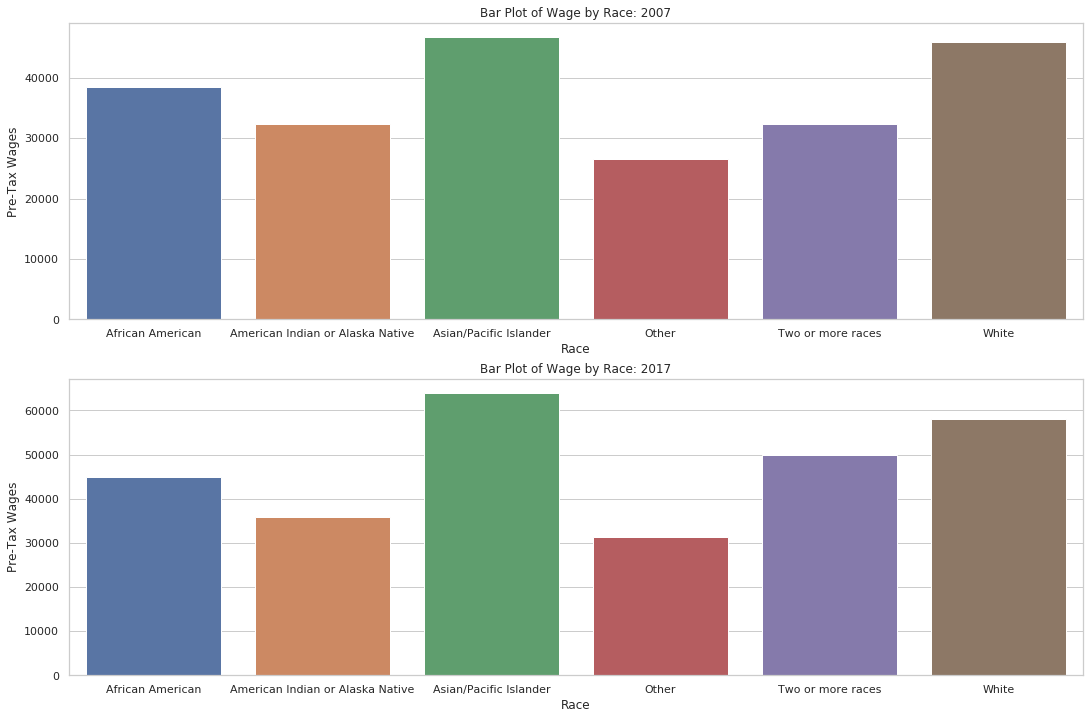

In [8]:
race_inc_2007 = poverty_2007.groupby('Race').mean()[['Pre-Tax Wages']]
race_inc_2017 = poverty_2017.groupby('Race').mean()[['Pre-Tax Wages']]

fig = plt.figure(figsize = (40, 12))
fig.add_subplot(221)
race_income_2007 = race_inc_2007.reset_index()
sns.barplot(x = 'Race', y = 'Pre-Tax Wages', data = race_income_2007)
plt.title('Bar Plot of Wage by Race: 2007');

fig.add_subplot(223)
race_income_2017 = race_inc_2017.reset_index()
sns.barplot(x = 'Race', y = 'Pre-Tax Wages', data = race_income_2017)
plt.title('Bar Plot of Wage by Race: 2017');

### Question 3

Comment on any patterns you notice in average wages by race.

##### WRITE YOUR ANSWER HERE.

<br><br><br>

# 4. Top Industries and Occupations in California <a id='industries'></a>
<br>

## 4.1. Top Industries in California <a id='pt3.2.1'></a>



Suppose we wanted to see what the top 10 industries the suvery respondents worked in between 2007 and 2017. We can bascially run a few lines of code to output another table that gives us the percentage of workers employed by each industry in 2007 and 2017.

**Run the cells below.**

In [9]:
round((industry_2007['Industry'].value_counts(normalize = True))[0:10] * 100, 2).to_frame(
).rename(columns={'Industry': 'Percentage of Workers Employed by Industry in 2007'})

,Percentage of Workers Employed by Industry in 2007
"Transportation, Warehouse",11.84
Health Care,10.86
Retail Trade,10.75
Manufacturing,10.23
Educational Services,9.16
Company Management,7.98
Accomodation and Food Services,6.15
Other services,4.89
Finance and Insurance,4.72
Public Administration,4.50


In [10]:
round((industry_2017['Industry'].value_counts(normalize = True))[0:10] * 100, 2).to_frame(
).rename(columns={'Industry': 'Percentage of Workers Employed by Industry in 2017'})

,Percentage of Workers Employed by Industry in 2017
Health Care,12.40
"Transportation, Warehouse",10.93
Retail Trade,9.99
Company Management,9.56
Educational Services,9.36
Manufacturing,9.32
Accomodation and Food Services,7.01
Other services,5.09
Public Administration,4.45
Waste Management,4.38


### Question 4

Based on the outputs of the tables above, what can you say about the changes in the top 10 industries of workers between 2007 and 2017 changed? Are there any extreme changes in percentages for a particular industry? Write your answer in the cell below by double clicking on it.

##### WRITE YOUR ANSWER HERE.

<br><br><br>
## 4.2. Top Industries in California by Metro Area <a id='pt3.2.2'></a>

The top 5 industries depicted above represented the top 5 industries in all of California. What if were interested in looking at specific metro areas in California?

Run the code cell below. Then use the dropdown cell to select the San Francisco-Oakland-Hayward Metro Area. You can then select another metro area that interest you to see the top 5 industries in that area.

**Run the cell below.**

In [11]:
#Joining both 2007 and 2017 tables.
industry = pd.concat([industry_2007, industry_2017])

def plot_occupations(county):
    plt.figure(figsize=(15,8));
    county_top_5 = industry[industry['County'] == county]
    p = sns.countplot(data=county_top_5,
                  x = 'Industry',
                  hue = 'Year', order=county_top_5['Industry'].value_counts(sort=True).index[0:5], 
                     palette = sns.color_palette("twilight_r"))
    p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
    p.set_title('Top 5 Industries in 2007 & 2017 in ' + str(county));
    p.set_xlabel('Industries');
    
county_widget = widgets.Dropdown(
    options=list(industry['County'].value_counts().index),
    value=list(industry['County'].value_counts().index)[0],
    description='Metro Area:',
    disabled=False,
)

interact(plot_occupations, county=county_widget);

interactive(children=(Dropdown(description='Metro Area:', options=('Los Angeles-Long Beach-Anaheim, CA', 'San …

### Question 5

What difference, if any, do you see in the top 5 industries in both years between California (the full dataset) and the metro area you selected? After reading a bit about your metro area's economy, what do you think? Write your answer in the cell below by double clicking on it.

##### WRITE YOUR ANSWER HERE.

<br><br><br>
## 4.3. Top Occupations in California by Metro Area <a id='pt3.2.3'></a> 


We can narrow our scope by analyzing the top 5 occupations in California by each Metro Area between 2007 and 2017. Run the cell below to see the Top 5 Occupations in 2007 and 2017.

**Run the cell below.**

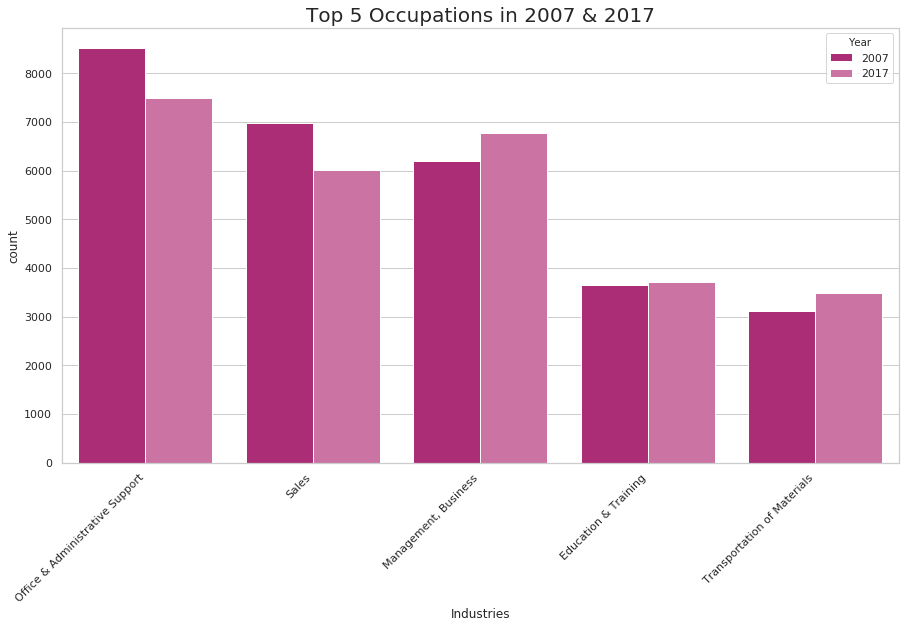

In [12]:
occupation = pd.DataFrame()
occupation = occupation.append(occupation_2007)
occupation = occupation.append(occupation_2017)
plt.figure(figsize=(15,8))
p = sns.countplot(data=occupation,
                  x = 'Occupation',
                  hue = 'Year', order=occupation['Occupation'].value_counts(sort=True).index[0:5], 
                 palette = sns.color_palette("PiYG", 10))
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha="right")
p.set_title('Top 5 Occupations in 2007 & 2017', fontdict= {'fontsize' : 20});
p.set_xlabel('Industries');

<br><br>
We can increase our understanding of the top 5 Occupation by narrowing our scope to specific Metro Areas.

Run the code cell below. Then use the dropdown cell to select the San Francisco-Oakland-Hayward Metro Area. You can then select another metro area that interest you to see the top 5 industries in that area.

**Run the cell below.**

In [13]:
def plot_occupations(county):
    plt.figure(figsize=(15,8));
    county_top_5 = occupation[occupation['County'] == county]
    p = sns.countplot(data=county_top_5,
                  x = 'Occupation',
                  hue = 'Year', order=county_top_5['Occupation'].value_counts(sort=True).index[0:5], 
                     palette = sns.color_palette("twilight"))
    p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
    p.set_title('Top 5 Occupations in 2007 & 2017 in ' + str(county));
    p.set_xlabel('Occupations');
    
county_widget = widgets.Dropdown(
    options=list(occupation['County'].value_counts().index),
    value=list(occupation['County'].value_counts().index)[0],
    description='Metro Area:',
    disabled=False,
)

interact(plot_occupations, county=county_widget);

interactive(children=(Dropdown(description='Metro Area:', options=('Los Angeles-Long Beach-Anaheim, CA', 'San …

### Question 6

What difference, if any, do you see in the top 5 occupations in both years between California (the full dataset) and the metro area you selected? After reading a bit about your metro area's economy, what do you think? Write your answer in the cell below by double clicking on it.

##### WRITE YOUR ANSWER HERE.

<br><br><br><br><br>
# 5. Income Analysis <a id='income'></a> 

In this section, we will analyze the distributions of household income. We will then look at percentiles of income gaps. Then we will look at the top five cities with highest and lowest income in 2007 and 2017.

<br><br>
## 5.1 Distributions of Household Income <a id='pt3.3.1'></a> 

For this section, we will analyze the distribution of household income from 2007 and 2017. To visualize this we use and **histogram**. Each rectangle in a histogram represents the proportion of values that fall in that range. In a sense, it is similar to a bar chart, but instead of categories on the x-axis, we group values into ranges. To learn more about histograms, you can click [here](https://en.wikipedia.org/wiki/Histogram).

An example can be seen in the code cell below. This should output two histograms: one representing income in 2007 and one representing income in 2017.

**Run the cell below.**

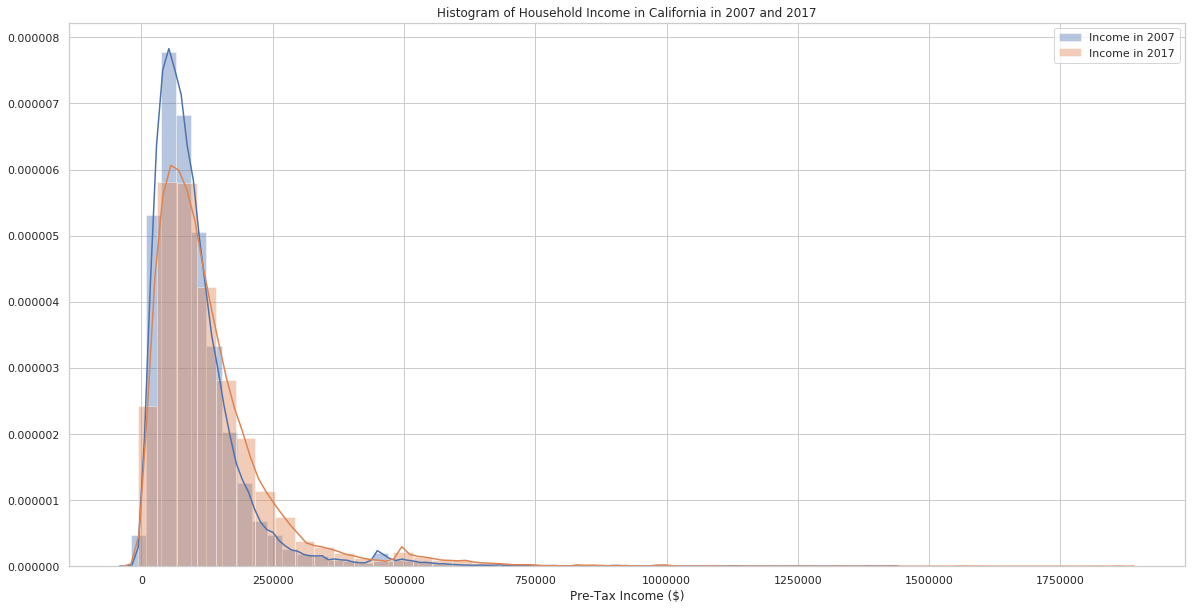

In [14]:
fig = plt.figure(figsize=(20,10))
plt.title('Histogram of Household Income in California in 2007 and 2017')

sns.distplot(poverty_2007['Household Income'], label = 'Income in 2007')
plt.xlabel('Household Income ($)');

sns.distplot(poverty_2017['Household Income'], label = 'Income in 2017')
plt.xlabel('Pre-Tax Income ($)');

plt.legend();
plt.show();

### Question 7

Analyze the shapes of these histograms. How are they similar/different? Compare them with their respective histogram for wages, which we generated earlier. Are there any differences? Why might these differences arise? </b> 
</div>

##### WRITE YOUR ANSWER HERE.

<br><br>
## 5.2 Income Inequality Statistics <a id='pt3.3.2'></a> 

Over the past decade, the issue of income inequality has increasingly manifested, across the United States. Let's see if our dataset can provide evidence for this claim. 

Specifically, let's test if the gap between bottom and top percentile incomes have increased or decreased over a span of a decade. The first cell below computes income gaps in 2007, while the second cell computes income gaps in 2017. 

**Run the cells below.**

In [15]:
first_2007, tenth_2007 = np.percentile(poverty_2007['Household Income'], 1), np.percentile(poverty_2007['Household Income'], 10)
twenty_fifth_2007, seventy_fifth_2007 = np.percentile(poverty_2007['Household Income'], 25), np.percentile(poverty_2007['Household Income'], 75)
ninety_2007, ninety_ninth_2007 = np.percentile(poverty_2007['Household Income'], 90), np.percentile(poverty_2007['Household Income'], 99)

print("The 75th and 25th percentile income gap is:", '$', np.round(seventy_fifth_2007 - twenty_fifth_2007, 2))
print("The 10th and 90th percentile income gap is:", '$', np.round(ninety_2007 - tenth_2007, 2))
print("The 1st and 99th percentile income gap is:", '$', np.round(ninety_ninth_2007 - first_2007, 2))

The 75th and 25th percentile income gap is: $ 79900.0
The 10th and 90th percentile income gap is: $ 162200.0
The 1st and 99th percentile income gap is: $ 489900.0


In [16]:
first_2017, tenth_2017 = np.percentile(poverty_2017['Household Income'], 1), np.percentile(poverty_2017['Household Income'], 10)
twenty_fifth_2017, seventy_fifth_2017 = np.percentile(poverty_2017['Household Income'], 25), np.percentile(poverty_2017['Household Income'], 75)
ninety_2017, ninety_ninth_2017 = np.percentile(poverty_2017['Household Income'], 90), np.percentile(poverty_2017['Household Income'], 99)

print("The 75th and 25th percentile income gap is:", '$', np.round(seventy_fifth_2017 - twenty_fifth_2017, 2))
print("The 10th and 90th percentile income gap is:", '$', np.round(ninety_2017 - tenth_2017, 2))
print("The 1st and 99th percentile income gap is:", '$', np.round(ninety_ninth_2017 - first_2017, 2))

The 75th and 25th percentile income gap is: $ 105900.0
The 10th and 90th percentile income gap is: $ 218000.0
The 1st and 99th percentile income gap is: $ 600020.0


### Question 8

Compare these statistics. Can we say that there has been a definite increase in income inequality from 2007 to 2017? Why might these numbers be misleading? Write your answer in the cell below by double clicking on it.

##### WRITE YOUR ANSWER HERE.

<br><br><br>
## 5.3 Household Incomes in Cities <a id='pt3.3.3'></a>  

Now, let's visualize the top cities with the highest and lowest average income in 2007 and 2017. The bar graph below will let you see the change in household income over the span of a decade. Run the cell below to visualize this output.

**Run the cells below.**

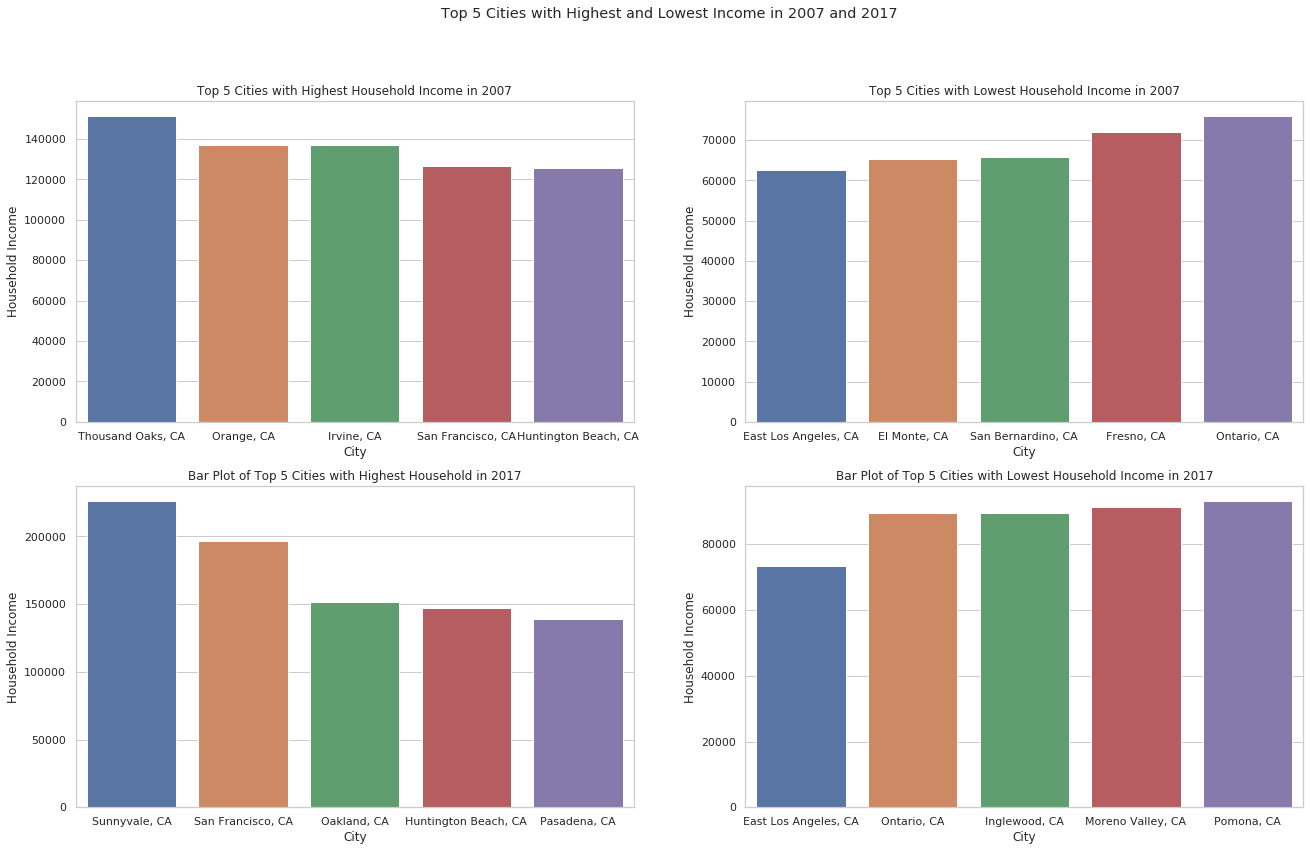

In [17]:
income_by_city = poverty_2007.groupby('City').mean()[['Household Income']].sort_values('Household Income')
fig = plt.figure(figsize = (22, 13))
plt.suptitle('Top 5 Cities with Highest and Lowest Income in 2007 and 2017')

fig.add_subplot(221)
top_5_income_by_city = income_by_city.sort_values('Household Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = top_5_income_by_city)
plt.title('Top 5 Cities with Highest Household Income in 2007');

fig.add_subplot(222)
bottom_5_income_by_city = income_by_city.sort_values('Household Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = bottom_5_income_by_city)
plt.title('Top 5 Cities with Lowest Household Income in 2007');

fig.add_subplot(223)
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Household Income']].sort_values('Household Income')
top_5_income_by_city_2017 = income_by_city_2017.sort_values('Household Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = top_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Highest Household in 2017');

fig.add_subplot(224)
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Household Income']].sort_values('Household Income')
bottom_5_income_by_city_2017 = income_by_city_2017.sort_values('Household Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = bottom_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Lowest Household Income in 2017');

plt.show();

### Question 9

Choose one of these cities in the top or bottom 5. Then, research the city and find out what county they are in. Finally, go to [this link](https://docs.google.com/spreadsheets/d/11qrDbIF3jszPh7NZj_Wqy014idYDgxI3IK9JUTtfhoQ/edit#gid=1014771596)
 and look up their mix of industries. Comment on your findings. Write your answer in the cell below by double clicking on it.

##### WRITE YOUR ANSWER HERE.

### Question 10

Write down any observations you have about these cities' placements. How they have changed? Does income inequality have some geographical component? Write your answer in the cell below by double clicking on it.

##### WRITE YOUR ANSWER HERE.

<br><br><br><br><br>
# 6. Educational Level Analysis <a id='education'></a>  

Now, let's do analysis on the educational level of survey respondents in California. First, we will analyze personal pre-tax wages based on education. Then, we will analyze the education levels of different races in California.

**Run the cell below to load the education datasets.**

In [18]:
education_seven = pd.read_csv('education_2007.csv') #={'Hours worked per week': int})
education_seventeen = pd.read_csv('education_2017.csv')# dtype={'Hours worked per week': int})
education = pd.concat([education_seven, education_seventeen])
education.replace(to_replace='99 (Topcode)', value=90, inplace=True)
education['Hours worked per week']=education['Hours worked per week'].astype('int64')

<br><br><br><br>
## 6.1 Education and Income <a id='pt3.4.1'></a>  

Our dataset contains two columns for income: `Household Income` (measured for the entire household) and `Pre-Tax Wages`. For our purposes, we will be focusing on `Pre-Tax Wages`. The graph below maps out wages received based on education level. The education levels can be seen in the x-axis, while the y-axis represents the total income. 

**Run the cell below.**

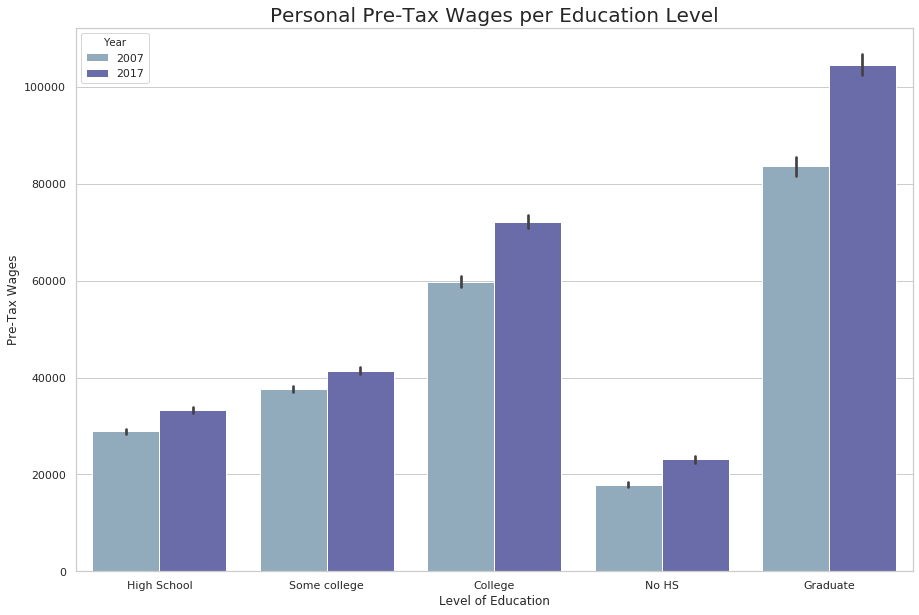

In [19]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Education Status', y='Pre-Tax Wages', 
                 hue='Year', data=education, 
                palette = sns.color_palette("twilight"))
ax.set_xlabel('Level of Education')
ax.set_ylabel('Pre-Tax Wages')
ax.set_title('Personal Pre-Tax Wages per Education Level', fontdict={'fontsize': 20});

### Question 11

How do the incomes you see above compare to our discussion aabout self-sufficiency incomes? What are some interpretations you can make from this chart? For more information on how family need is acessed, you can go to the [Family Need Calculator](https://insightcced.org/2018-family-needs-calculator/). Write your answer in the cell below by double clicking on it.

##### WRITE YOUR ANSWER HERE.

<br><br><br>
## 6.2. Education by Race <a id='pt3.4.2'></a>  

Another question we can ask is: How is race distributed among educational levels? Are race and education related?

First, let's look at the the precentages of each race based on educational level. We can see this directly from the dataset below. We can also visualize this in a bar graph.

**Run the cell below to load the education datasets.**

In [20]:
education_race = pd.crosstab(education['Race'],education['Education Status'], normalize='index') * 100
education_race

Education Status,College,Graduate,High School,No HS,Some college
Race,,,,,
African American,17.839669,10.801656,33.835152,4.309371,33.214151
American Indian or Alaska Native,9.609895,5.423406,42.055186,13.796384,29.115128
Asian/Pacific Islander,34.681644,20.316466,18.852946,5.594859,20.554085
Other,8.188266,2.611219,39.954868,28.394584,20.851064
Two or more races,22.354130,10.608740,29.931801,8.588027,28.517302
White,23.127057,14.626601,27.735547,9.211692,25.299102


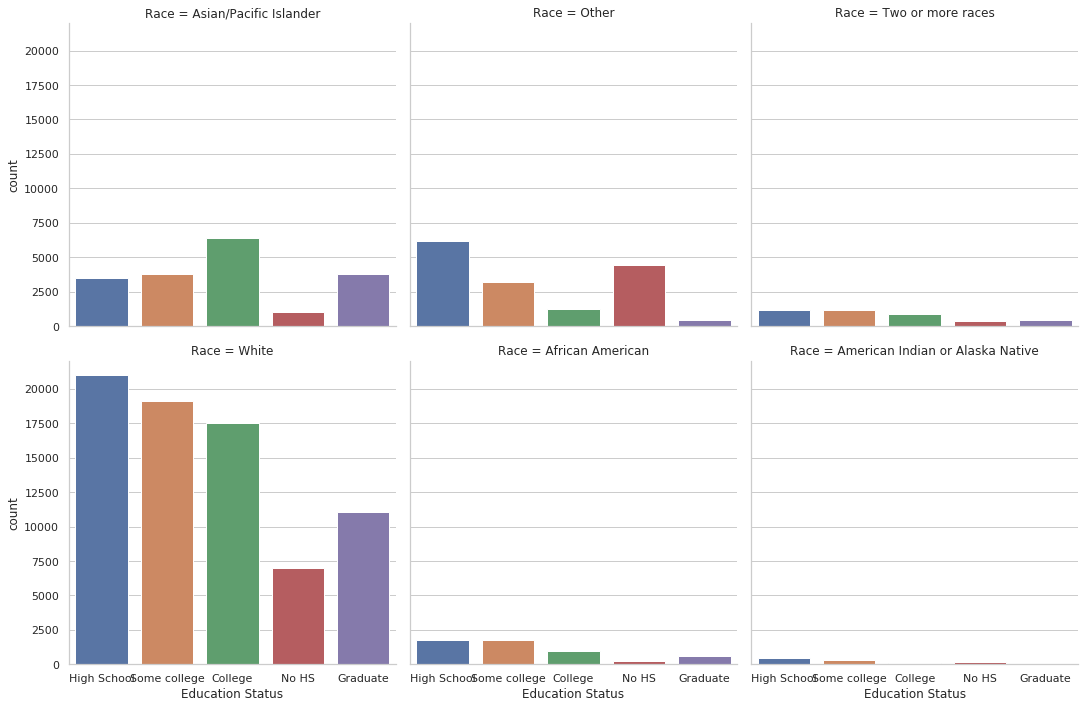

In [21]:
ax = sns.catplot(x='Education Status', col='Race', 
            data=education, kind='count', col_wrap=3, orient="h");

### Question 12

What conclusions can you draw about the relationship between race and education based on these charts?

##### WRITE YOUR ANSWER HERE.

<br><br><br>
One thing to note is that the dataset contains a separate column for Hispanic-identifying individuals. We can display the same visualization for those in each category in the `Hispanic` column. The categories include: (1) Hispanic = Not Hispanic, (2) Hispanic = Hispanic, and (3) Hispanic = other.

<Figure size 1440x720 with 0 Axes>

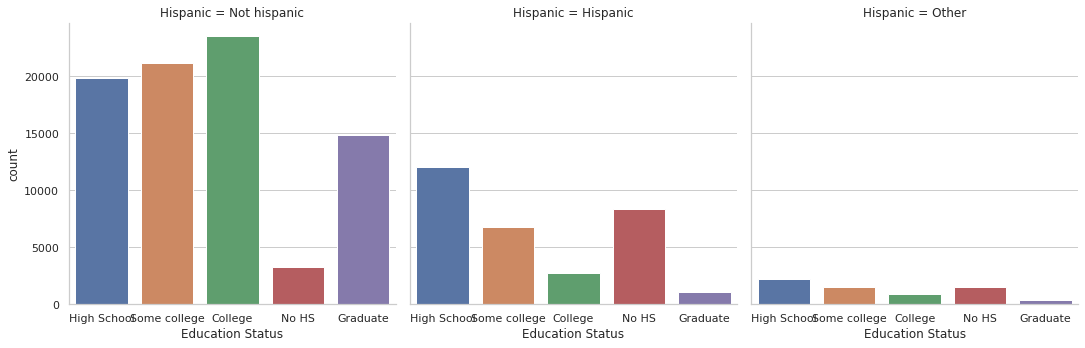

In [22]:
plt.figure(figsize=(20, 10));
ax = sns.catplot(x='Education Status', col='Hispanic', data=education, kind='count', col_wrap=3, orient="h");
plt.show();

### Question 13

Are the results any different from the ones above? If so, what are the differences?

##### WRITE YOUR ANSWER HERE.

<br><br><br><br>
# 7. Indicators of Poverty <a id='poverty'></a>  

What are the indicators of poverty? What relationship does poverty have with the other features (columns) in our dataset? In this section we will answer some of these questions as well as do analysis based on employment status and see which occupations fall under high poverty.

In [23]:
poverty_seven = pd.read_csv('poverty_2007.csv')
poverty_seventeen = pd.read_csv('poverty_2017.csv')
poverty = pd.concat([poverty_seven, poverty_seventeen])
poverty.replace(to_replace='99 (Topcode)', value=90, inplace=True)
poverty['Hours worked per week'] = poverty['Hours worked per week'].astype(int)

<br><br><br>
## 7.1 Employment Status <a id='pt3.5.1'></a>  

For poverty, our data categorizes an individual into one of three categories: `Near Poverty`, `Non-Poverty`, and `Poverty`. We will be looking at those who are in `Poverty` or `Near Poverty`.

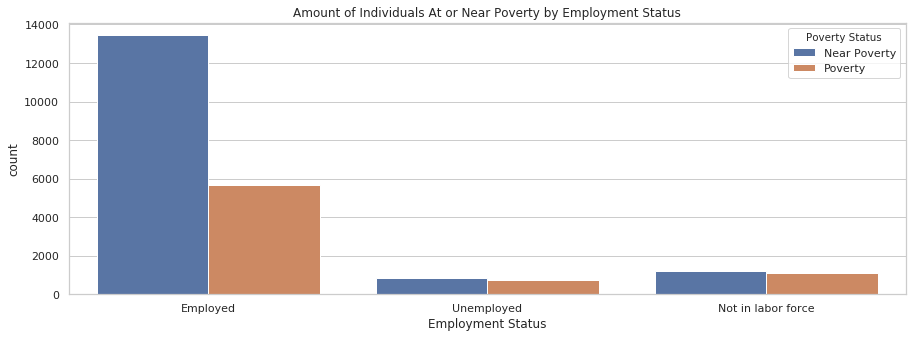

In [24]:
plt.figure(figsize=(15, 5))
all_poverty = poverty[(poverty['Poverty Status'] == 'Poverty') | (poverty['Poverty Status'] == 'Near Poverty')]
sns.countplot(x='Employment Status', data=all_poverty, hue='Poverty Status')
plt.title('Amount of Individuals At or Near Poverty by Employment Status');

<br><br><br>
## 7.2 Occupations in High-Poverty Areas <a id='pt3.5.2'></a>  

What are the top 5 occupations for people in poverty? Run the cell below, it should output the top 5 occupations for those at OR near poverty.

In [25]:
j = 1
for i in occupation[(occupation['Poverty Status'] == 'Poverty') | 
                    (occupation['Poverty Status'] == 'Near Poverty')]['Occupation'].value_counts(
    sort=True).index[0:5]:
    print(j, 'Top Occupation:', i)
    j +=1

1 Top Occupation: Office & Administrative Support
2 Top Occupation: Sales
3 Top Occupation: Food Preparation
4 Top Occupation: Transportation of Materials
5 Top Occupation: Building & Grounds Cleaning


<br><br><br><br>
## Conclusion

Congratulations! You've now reached the end of the lab. For some of you, this may have been your first time being introduced into using computer programming to automate data analysis. We hope you gained some insight on how to analyze data about communities with their respective deomographics and had fun along the way. 

## Submitting your work
To convert your work to a pdf:
- run the following cell
- right-click the link that says "Download this and submit to gradescope"
- click "save link as" to save the pdf

<div class="alert alert-warning">
NOTE: the link will say "Submit to Gradescope", but please follow your professor's instructions on where to submit the pdf 
</div>

<div class="alert alert-warning">
NOTE II: if you're having trouble downloading the databook, make sure you're <b>right-clicking</b> the link and selecting "save link as"
</div>

In [2]:
!pip install gsExport -q
import gsExport
gsExport.generateSubmission("CityPlanningACS.ipynb")

Processing CityPlanningACS.ipynb
Generated notebook and autograded
Attempting to compile LaTeX
Finished generating PDF


<br><br><br>
# 8. Bibliography <a id = 'bibliography'></a>

• https://www.census.gov/programs-surveys/saipe/guidance/model-input-data/cpsasec.html

• https://www.investopedia.com/terms/c/consumerpriceindex.asp

• https://en.wikipedia.org/wiki/Stratified_sampling

• https://www.census.gov/programs-surveys/acs

<br>

# 9. Data Science Resources at UC Berkeley <a id='6'></a>
If you need assistance with this notebook, our peer advisors are happy to help. You can find their drop-in hours [here](https://data.berkeley.edu/academics/resources/peer-consulting). You can also email ds-peer-consulting@berkeley.edu to book an appointment if the times conflict with your schedule.

If you are interested in data science, a great course to start with is Data 8, designed for students with no previous programming or statistics experience. For the full list of courses and degree programs we offer, click [here](https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings).

### Feedback:

Please let us know your thoughts on this notebook!

Fill out the survey at this link: https://docs.google.com/forms/d/e/1FAIpQLSfahkYSKqlEEfC6WMKlaqeIxRVj0r7T4N5lgBf9bRVwRG58wQ/viewform

___
### Sidenotes:
[1]: Since the size of the original dataset was too large, we are using Stratified Random Samples instead. Refer to the link in the bibliography for more information on our sampling approach. 